### MIMIC CXR

* [Dataset](https://physionet.org/content/mimic-cxr/2.0.0/)

* [Original Paper](https://www.nature.com/articles/s41597-019-0322-0)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/mimic/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['text', 'image_id'], inplace=True)
df.disease_label = df.disease_label.astype(str)
df.head()

,path,race_label,sex_label,disease_label,subject_id,study_id,split,file_path,image_embedding_0,image_embedding_1,...,text_embedding_502,text_embedding_503,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511
0,p19/p19702416/s51321189/d85c9f15-f0f84927-761f...,0,0,3,19702416,51321189,train,datasets/mimic/files/p19/p19702416/s51321189.txt,0.017584,-0.003019,...,-0.052364,-0.018894,0.101141,0.003454,-0.030474,0.013750,-0.007859,0.061135,0.050736,-0.005674
1,p13/p13339704/s51292704/0024603b-12db30e2-ab32...,2,0,3,13339704,51292704,train,datasets/mimic/files/p13/p13339704/s51292704.txt,0.025167,-0.008093,...,-0.045582,-0.014851,0.052466,-0.013415,-0.023199,0.001723,0.004433,0.036226,0.035885,-0.000904
2,p13/p13339704/s51292704/7953848d-2411f0df-859f...,2,0,3,13339704,51292704,train,datasets/mimic/files/p13/p13339704/s51292704.txt,0.027844,-0.001912,...,-0.045582,-0.014851,0.052466,-0.013415,-0.023199,0.001723,0.004433,0.036226,0.035885,-0.000904
3,p12/p12668169/s54048859/8a4aaaee-55fcf98f-a036...,0,0,3,12668169,54048859,train,datasets/mimic/files/p12/p12668169/s54048859.txt,0.041953,0.002593,...,-0.031608,-0.018585,0.020580,0.012898,0.000496,0.035545,0.023832,-0.059201,0.019583,-0.003538
4,p10/p10309415/s58144222/9886b0fe-9121c65e-c8d7...,0,0,3,10309415,58144222,train,datasets/mimic/files/p10/p10309415/s58144222.txt,0.012712,0.006450,...,-0.038537,-0.009317,0.057783,-0.010010,-0.025244,0.002658,0.010754,0.027053,0.024629,0.007983


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'disease_label'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (107695, 1032)
Test Shape: (30360, 1032)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
The number of parameters of the model are: 131972
Epoch 1/50 - Test Accuracy: 0.5264, macro-f1: 0.4250, macro-AUC: 0.7106
Epoch 1/50 - Training Time: 5.46 seconds | Inference Time: 1.30 seconds
Epoch 2/50 - Test Accuracy: 0.5170, macro-f1: 0.4170, macro-AUC: 0.7068
Epoch 2/50 - Training Time: 5.44 seconds | Inference Time: 1.21 seconds
Epoch 3/50 - Test Accuracy: 0.6177, macro-f1: 0.4819, macro-AUC: 0.7191
Epoch 3/50 - Training Time: 5.38 seconds | Inference Time: 1.42 seconds
Epoch 4/50 - Test Accuracy: 0.5353, macro-f1: 0.4333, macro-AUC: 0.7153
Epoch 4/50 - Training Time: 5.22 seconds | Inference Time: 1.37 seconds
Epoch 5/50 - Test Accuracy: 0.5560, macro-f1: 0.4440, macro-AUC: 0.7196
Epoch 5/50 - Training Time: 5.71 seconds | Inference Time: 1.18 seconds
Epoch 6/50 - Test Accuracy: 0.5471, macro-f1: 0.4417, macro-AUC: 0.7216
Epoch 6/50 - Training Time: 5.29 seconds | Inference Time: 1.38 seconds
Epoch 7/50 - Test Accuracy: 0.5885, macro-f1: 0.4675, mac

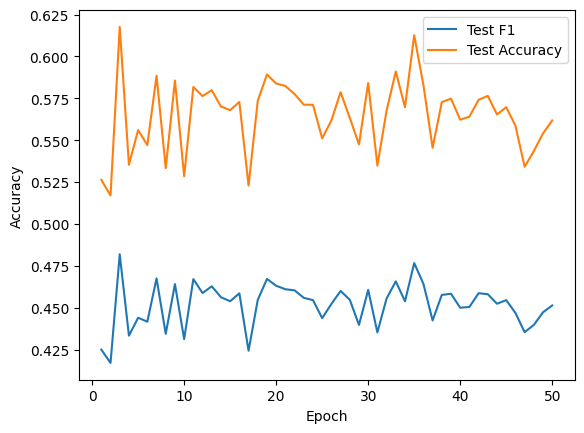

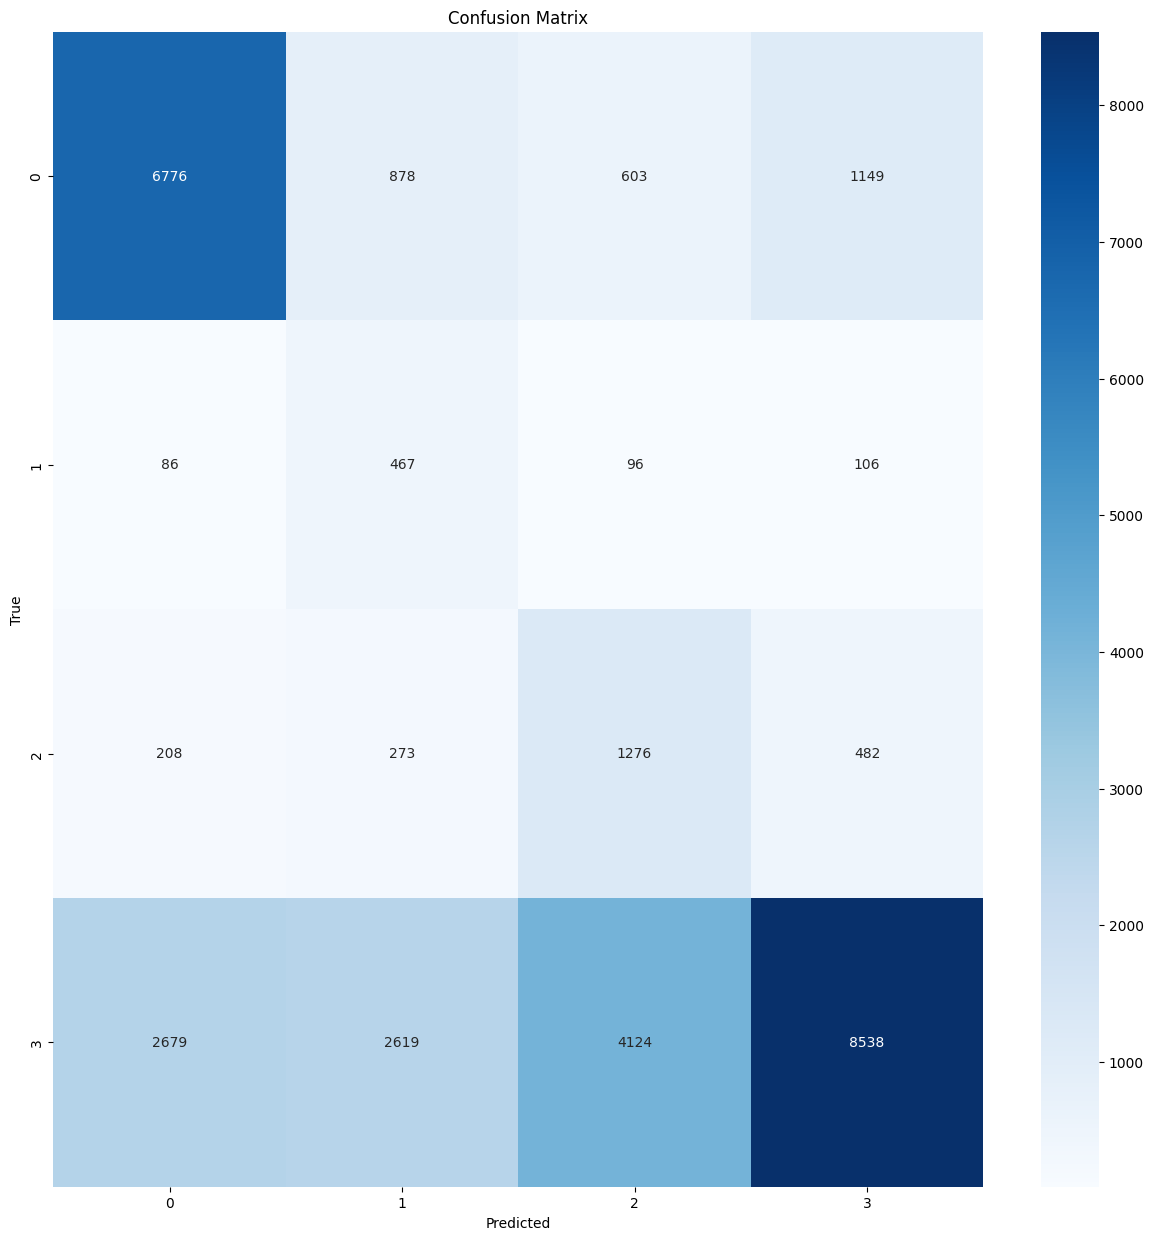

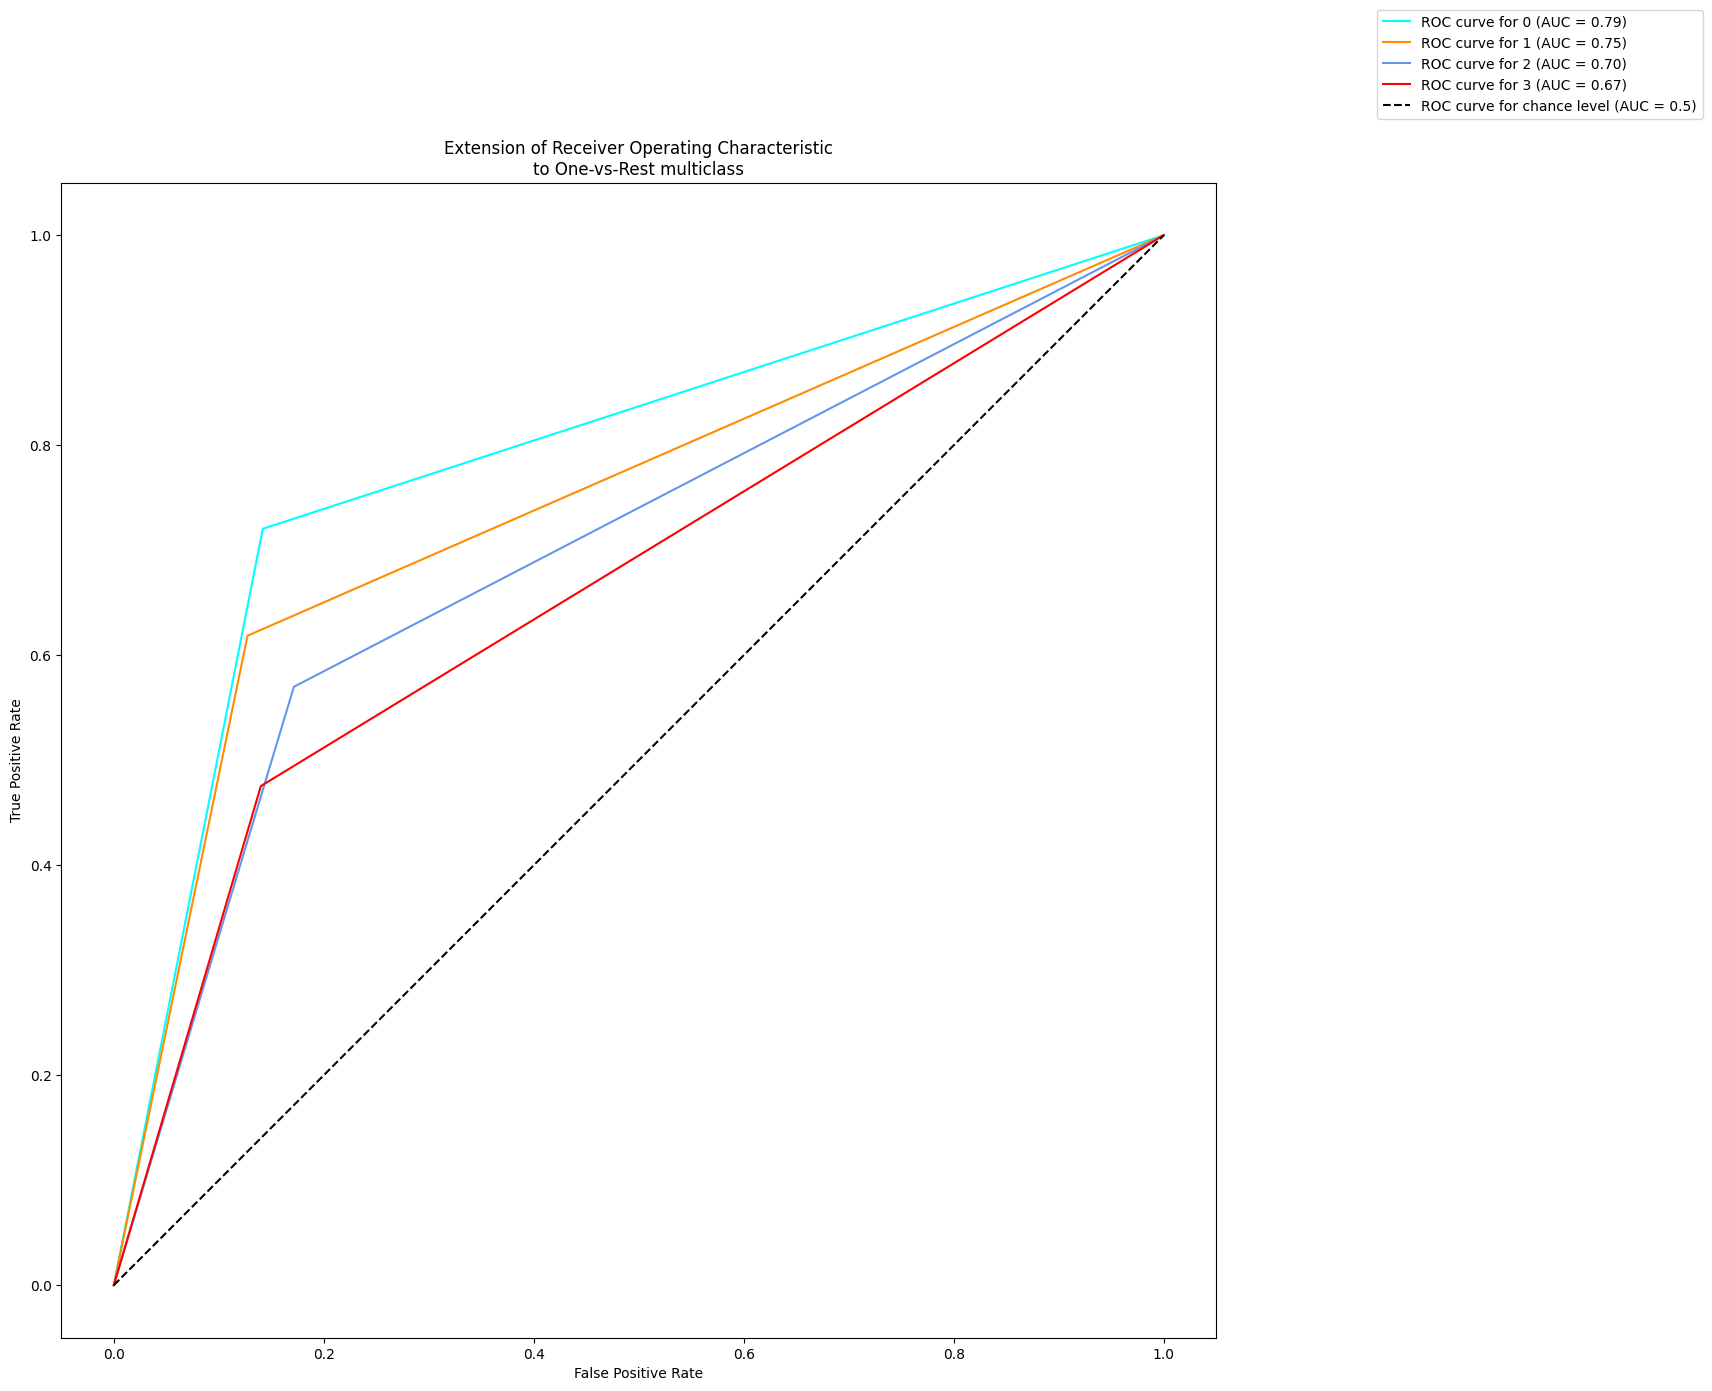

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      9406
           1       0.11      0.62      0.19       755
           2       0.21      0.57      0.31      2239
           3       0.83      0.48      0.60     17960

    accuracy                           0.56     30360
   macro avg       0.46      0.60      0.45     30360
weighted avg       0.73      0.56      0.60     30360



(0.561824769433465,
 0.7250688058008173,
 0.561824769433465,
 0.6041859342680853,
 {'Acc': {'Acc': 0.6176548089591568,
   'F1': 0.48191547873264096,
   'Auc': 0.7191409232977313,
   'Epoch': 3,
   'Auc_Per_Class': array([0.78860511, 0.71699574, 0.67782738, 0.69313546])},
  'Macro-F1': {'Acc': 0.6176548089591568,
   'F1': 0.48191547873264096,
   'Auc': 0.7191409232977313,
   'Epoch': 3,
   'Auc_Per_Class': array([0.78860511, 0.71699574, 0.67782738, 0.69313546])},
  'AUC': {'Acc': 0.5838274044795784,
   'F1': 0.46311249512871844,
   'Auc': 0.7270865050707166,
   'Epoch': 20,
   'Auc_Per_Class': array([0.78603742, 0.74938299, 0.69235795, 0.68056766])}})

In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=multilabel, report=True)

Training Late Fusion Model:
The number of parameters of the model are: 66436
Epoch 1/50 - Test Accuracy: 0.5325, macro-f1: 0.4321, macro-AUC: 0.7135
Epoch 1/50 - Training Time: 6.38 seconds | Inference Time: 1.18 seconds
Epoch 2/50 - Test Accuracy: 0.5616, macro-f1: 0.4471, macro-AUC: 0.7195
Epoch 2/50 - Training Time: 6.17 seconds | Inference Time: 1.19 seconds
Epoch 3/50 - Test Accuracy: 0.5574, macro-f1: 0.4476, macro-AUC: 0.7227
Epoch 3/50 - Training Time: 5.80 seconds | Inference Time: 1.19 seconds
Epoch 4/50 - Test Accuracy: 0.5849, macro-f1: 0.4638, macro-AUC: 0.7249
Epoch 4/50 - Training Time: 6.12 seconds | Inference Time: 1.31 seconds
Epoch 5/50 - Test Accuracy: 0.5610, macro-f1: 0.4507, macro-AUC: 0.7237
Epoch 5/50 - Training Time: 5.94 seconds | Inference Time: 1.27 seconds
Epoch 6/50 - Test Accuracy: 0.5567, macro-f1: 0.4472, macro-AUC: 0.7256
Epoch 6/50 - Training Time: 6.35 seconds | Inference Time: 1.35 seconds
Epoch 7/50 - Test Accuracy: 0.5736, macro-f1: 0.4570, macro

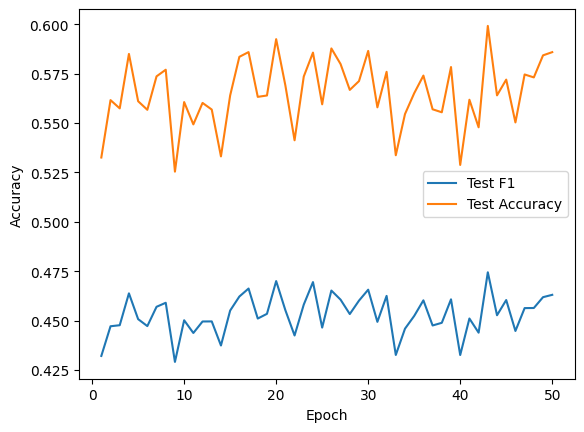

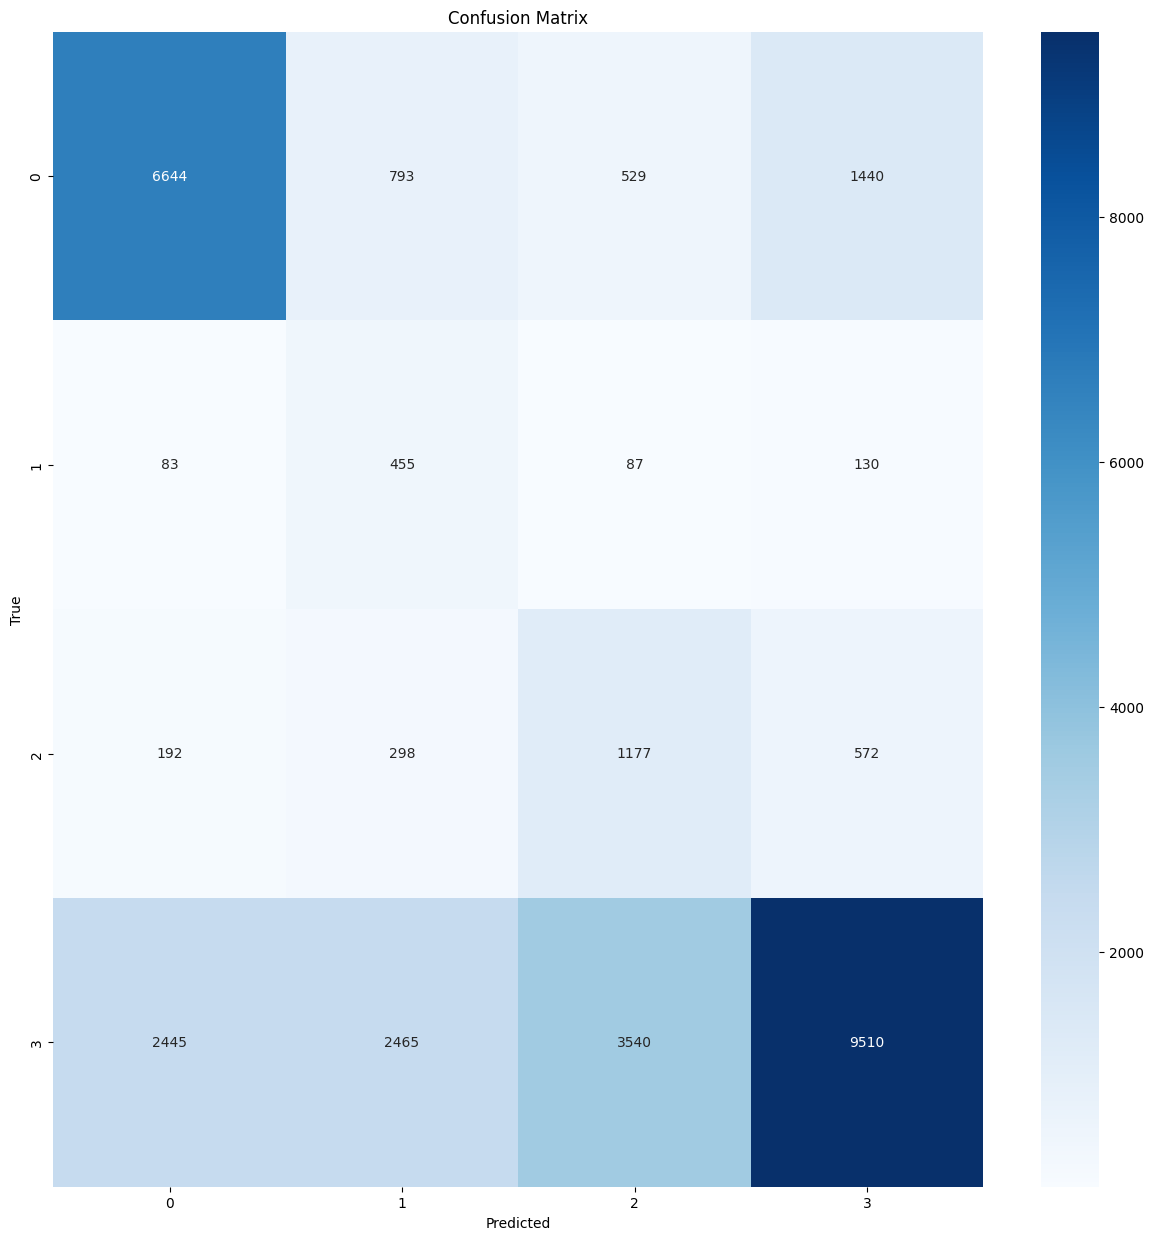

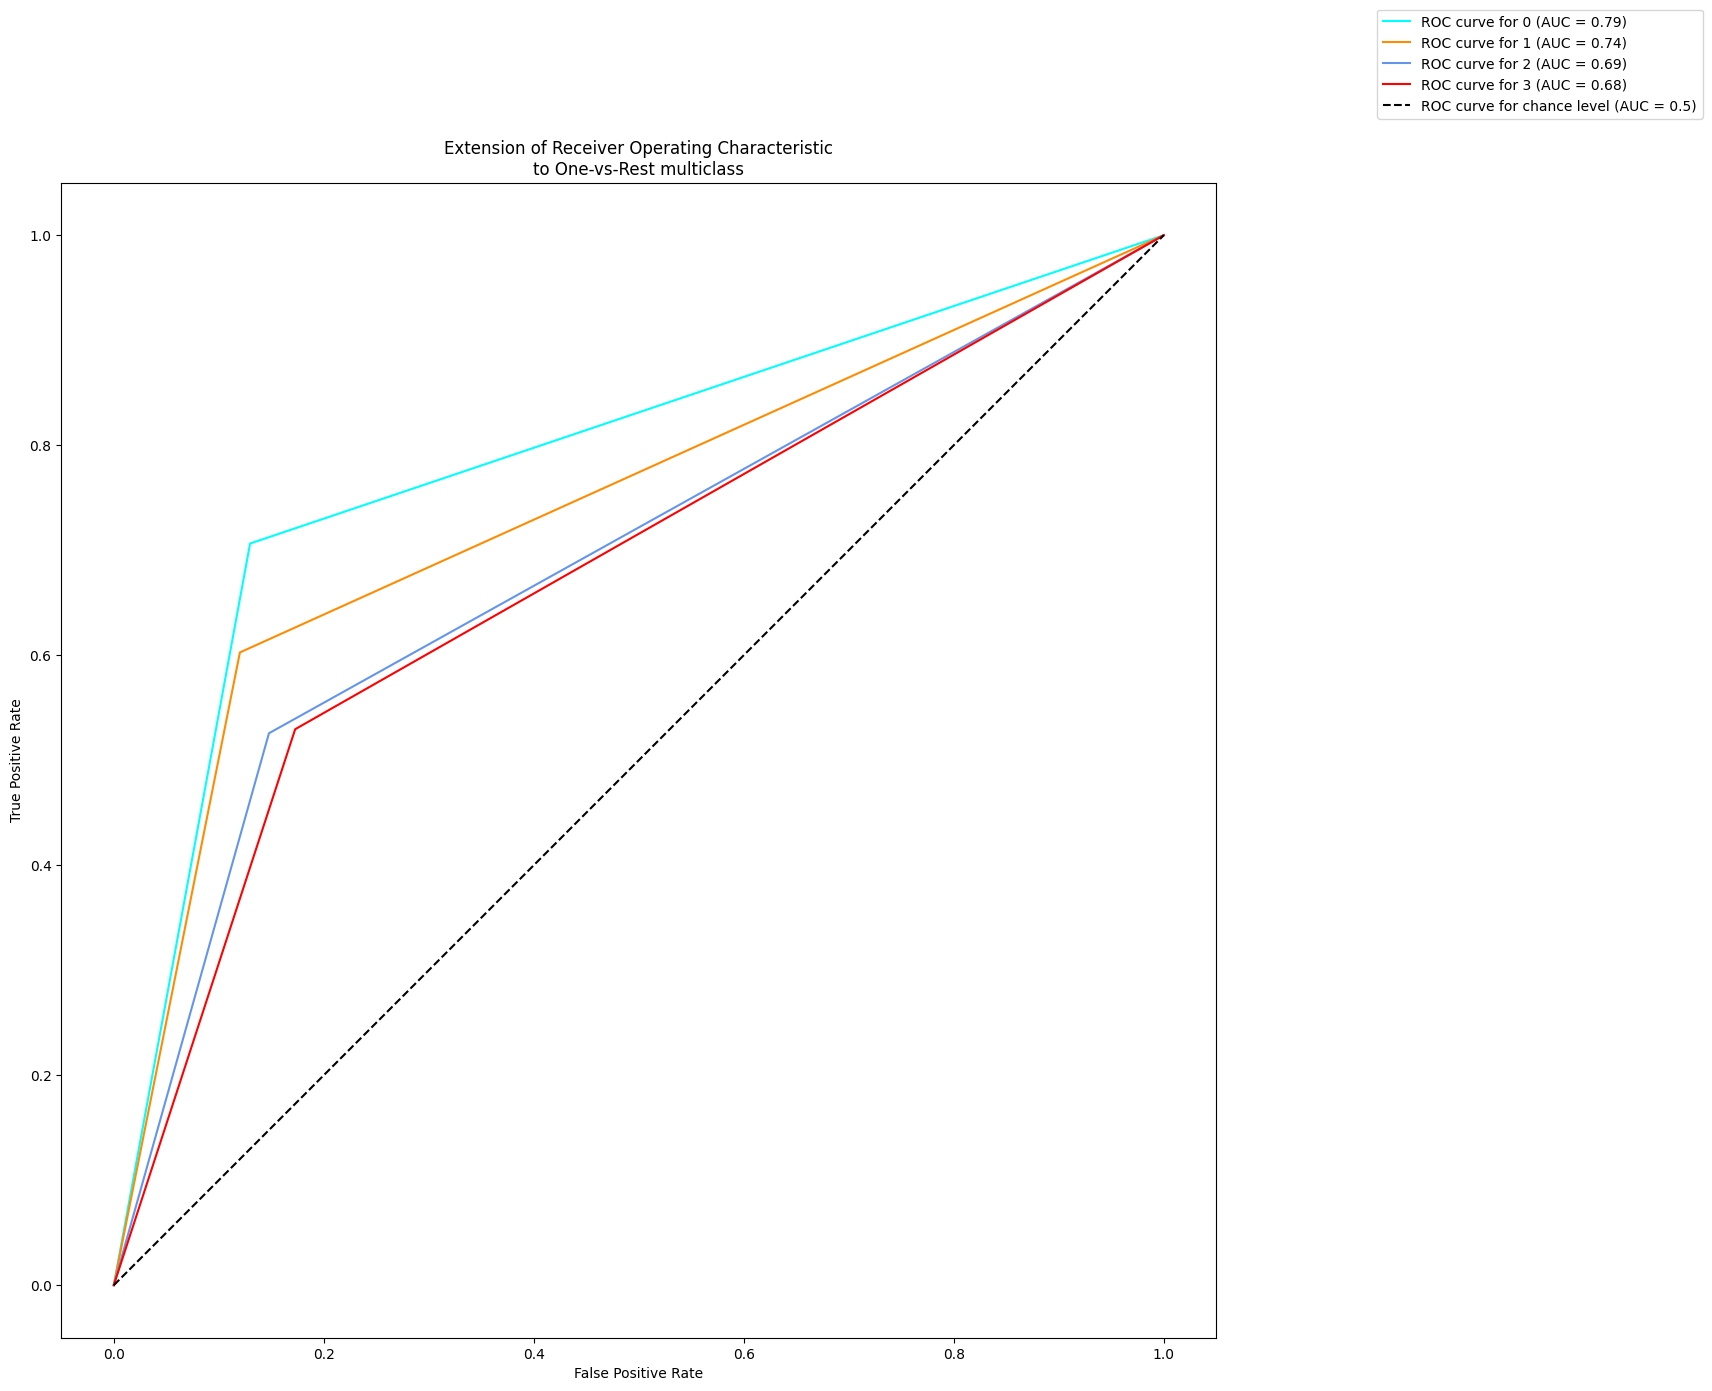

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      9406
           1       0.11      0.60      0.19       755
           2       0.22      0.53      0.31      2239
           3       0.82      0.53      0.64     17960

    accuracy                           0.59     30360
   macro avg       0.46      0.59      0.46     30360
weighted avg       0.72      0.59      0.63     30360



(0.585836627140975,
 0.7217387817996054,
 0.585836627140975,
 0.6269738238090037,
 {'Acc': {'Acc': 0.5991106719367589,
   'F1': 0.4744299248179638,
   'Auc': 0.7263753051226732,
   'Epoch': 43,
   'Auc_Per_Class': array([0.79379772, 0.73082417, 0.69663908, 0.68424025])},
  'Macro-F1': {'Acc': 0.5991106719367589,
   'F1': 0.4744299248179638,
   'Auc': 0.7263753051226732,
   'Epoch': 43,
   'Auc_Per_Class': array([0.79379772, 0.73082417, 0.69663908, 0.68424025])},
  'AUC': {'Acc': 0.5856060606060606,
   'F1': 0.46945885703361645,
   'Auc': 0.7298538376360295,
   'Epoch': 24,
   'Auc_Per_Class': array([0.79663894, 0.73777832, 0.70812107, 0.67687702])}})

In [7]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=multilabel, report=True)